In [23]:
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [66]:
def u(x):
    return np.where(x < 0, 0 + (0.42 / (0 - (-30))) * x,
                    np.where(x < 35, 0.42 + ((0.75 - 0.42) / (35 - 0)) * x,
                             0.75 + ((1 - 0.75) / (70 - 35)) * x))

In [67]:
Q = np.random.uniform(low=0, high=10, size=100000)
R = np.random.binomial(n=1, p=(10 - Q) / 10)
# 0.5740569935537003

In [68]:
# Case 1: don't do the market research
Us = [u(10 * (7 - q)) for q in Q]
np.array(Us).mean()

0.5326255826177118

In [69]:
# Case 2: follow the market research
utilities = []
for i in range(len(Q)):
    if R[i] == 1:
        utilities.append(u(10*(7-Q[i]) - 1))
    else:
        utilities.append(u(-1))

np.array(utilities).mean()

0.4063839649397851

In [84]:
# MCMC:

model = pm.Model()

with model:

    Q = pm.Uniform("Q", lower=0, upper=10)
    R = pm.Bernoulli("R", p=(10 - Q) / 10, observed=1)
    X = pm.Deterministic("X", 10 * (7 - Q) - 1)

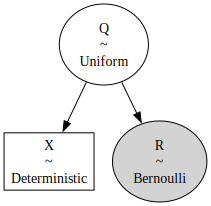

In [85]:
pm.model_to_graphviz(model)

In [88]:
with model:
    trace = pm.sample(draws=20000, tune=1000, chains=4, random_seed=0,)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 23 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Q,3.332,2.360,0.000,7.552,0.013,0.009,29822.0,31284.0,1.0
X,35.678,23.604,-6.518,68.998,0.130,0.100,29822.0,31284.0,1.0


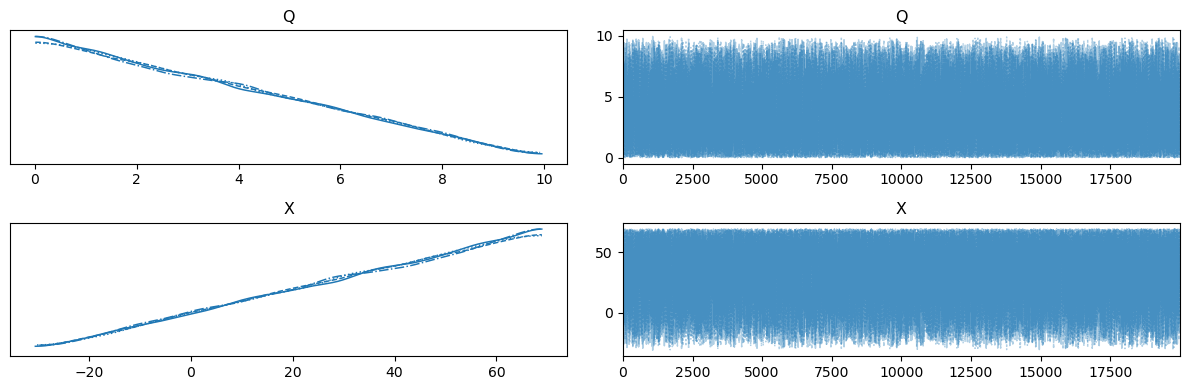

In [89]:
with model:
    display(az.summary(trace))
    az.plot_trace(trace)
    plt.tight_layout()
    

In [91]:
# calculate the expected utility
s = [u(i) for i in trace['posterior']['X']]

In [92]:
np.mean(s)

0.828773040680603